# Student Details

***

**Name:** Hoai Nhan Nguyen <br>
**Student Number:** sba24098 <br>
**Course:** Higher Diploma in Science in Artificial Intelligence Applications

***

# Data Cleaning and Transformation


**Importing Apache Spark Libraries.**

In [1]:
# Importing libraries 
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col, sum, when, regexp_replace, round

**Creating a new Spark Session.**

In [3]:
# Creating new SparkSession
spark = SparkSession.builder \
    .appName("MySparkApp") \
    .master("local[*]") \
    .config("spark.driver.host", "localhost") \
    .getOrCreate()

**Reading the Amazon-Products.csv in Hadoop.**

In [3]:
# Reading Amazon-Products.csv in Hadoop while applying options to read it correctly
df = spark.read.option("header", "true") \
               .option("inferSchema", "true") \
               .option("multiLine", "true") \
               .option("escape", "\"") \
               .option("quote", "\"") \
               .csv("hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products.csv")

**Understanding the structure of the Spark Dataframe.**

In [4]:
# Reviewing the schema of the Spark Dataframe
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- main_category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- image: string (nullable = true)
 |-- link: string (nullable = true)
 |-- ratings: string (nullable = true)
 |-- no_of_ratings: string (nullable = true)
 |-- discount_price: string (nullable = true)
 |-- actual_price: string (nullable = true)



In [5]:
# Dropping the columns that are not required for this task 
df = df.drop("_c0","image","link")
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- main_category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- ratings: string (nullable = true)
 |-- no_of_ratings: string (nullable = true)
 |-- discount_price: string (nullable = true)
 |-- actual_price: string (nullable = true)



In [6]:
# Reviewing the rows of the Spark dataframe 
df.show()

+--------------------+-------------+----------------+-------+-------------+--------------+------------+
|                name|main_category|    sub_category|ratings|no_of_ratings|discount_price|actual_price|
+--------------------+-------------+----------------+-------+-------------+--------------+------------+
|Lloyd 1.5 Ton 3 S...|   appliances|Air Conditioners|    4.2|        2,255|       ₹32,999|     ₹58,990|
|LG 1.5 Ton 5 Star...|   appliances|Air Conditioners|    4.2|        2,948|       ₹46,490|     ₹75,990|
|LG 1 Ton 4 Star A...|   appliances|Air Conditioners|    4.2|        1,206|       ₹34,490|     ₹61,990|
|LG 1.5 Ton 3 Star...|   appliances|Air Conditioners|    4.0|           69|       ₹37,990|     ₹68,990|
|Carrier 1.5 Ton 3...|   appliances|Air Conditioners|    4.1|          630|       ₹34,490|     ₹67,790|
|Voltas 1.4 Ton 3 ...|   appliances|Air Conditioners|    4.0|        1,666|       ₹31,990|     ₹70,990|
|Lloyd 1.0 Ton 3 S...|   appliances|Air Conditioners|    4.2|   

25/04/17 23:24:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
 Schema: _c0, name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
Expected: _c0 but found: 
CSV file: hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products.csv


In [7]:
# Get the number of rows
num_rows = df.count()
# Get the number of columns
num_columns = len(df.columns)

# Printing the shape (rows, columns)
print(f"Shape of the DataFrame: ({num_rows}, {num_columns})")


25/04/17 23:24:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
 Schema: _c0, name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
Expected: _c0 but found: 
CSV file: hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products.csv
[Stage 3:>                                                          (0 + 1) / 1]

Shape of the DataFrame: (551585, 7)


**Checking the null values in the Spark Dataframe.**

In [8]:
# Counting the null or empty values per column
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

25/04/17 23:24:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
 Schema: _c0, name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
Expected: _c0 but found: 
CSV file: hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products.csv
[Stage 6:>                                                          (0 + 1) / 1]

+----+-------------+------------+-------+-------------+--------------+------------+
|name|main_category|sub_category|ratings|no_of_ratings|discount_price|actual_price|
+----+-------------+------------+-------+-------------+--------------+------------+
|   0|            0|           0| 175794|       175794|         61163|       17813|
+----+-------------+------------+-------+-------------+--------------+------------+



**Handling Null values in the Spark Dataframe.**

In [9]:
# Filtering out rows where both 'discount_price' and 'actual_price' are null.
df_clean = df.filter(~(col("discount_price").isNull() & col("actual_price").isNull()))

# Filling the null values for ratings, no_of_ratings, discount_price and actual_price to 0
df_clean = df_clean.fillna({"ratings": 0,"no_of_ratings": 0, "discount_price":0, "actual_price":0})

In [10]:
# Counting the null or empty values per column
df_clean.select([
    sum(when(col(column_name).isNull() | (col(column_name) == ""), 1).otherwise(0)).alias(column_name + "_nulls")
    for column_name in df.columns
]).show()

25/04/17 23:24:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
 Schema: _c0, name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
Expected: _c0 but found: 
CSV file: hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products.csv
[Stage 9:>                                                          (0 + 1) / 1]

+----------+-------------------+------------------+-------------+-------------------+--------------------+------------------+
|name_nulls|main_category_nulls|sub_category_nulls|ratings_nulls|no_of_ratings_nulls|discount_price_nulls|actual_price_nulls|
+----------+-------------------+------------------+-------------+-------------------+--------------------+------------------+
|         0|                  0|                 0|            0|                  0|                   0|                 0|
+----------+-------------------+------------------+-------------+-------------------+--------------------+------------------+



**Handling duplicate rows in the Spark Dataframe.**

In [11]:
# Removing the duplicate rows based on name from the Spark DataFrame 
df_clean = df_clean.dropDuplicates(["name"])


**Cleaning the ratings and no_of_rating columns.**

In [12]:
# Ensuring the rows where the 'ratings' column contains valid numbers (integers or decimals).
df_clean = df_clean.filter(F.col('ratings').rlike(r'^[0-9]*\.?[0-9]+$'))

# Ensuring ratings are between 0 and 5.0
df_clean = df_clean.filter((F.col('ratings') >= 0) & (F.col('ratings') <= 5.0))


In [13]:
# Removing commas from 'no_of_ratings'
df_clean = df_clean.withColumn("no_of_ratings", regexp_replace(col("no_of_ratings"), ",", ""))

# Ensuring the rows where the 'no_of_ratings' column contains valid numbers (integers).
df_clean = df_clean.filter(col("no_of_ratings").rlike("^[0-9]+$"))

**Converting currency from Indian Rupee to Euro for the actual_price and discount_price columns.**

In [14]:
# Removing ₹, commas and convert to double
df_converted = df_clean.withColumn(
    "actual_price",
    regexp_replace(col("actual_price"), "[₹,]", "").cast("double")  
)

# Converting INR to EUR (using conversion rate: 1 INR = 0.011 EUR)
conversion_rate = 0.011
df_converted = df_converted.withColumn(
    "actual_price",
    round(col("actual_price") * conversion_rate, 2)
)

In [15]:
# Removing ₹, commas and convert to double
df_converted = df_converted.withColumn(
    "discount_price",
    regexp_replace(col("discount_price"), "[₹,]", "").cast("double") 
)

# Converting INR to EUR (using conversion rate: 1 INR = 0.011 EUR)
conversion_rate = 0.011
df_converted = df_converted.withColumn(
    "discount_price",
    round(col("discount_price") * conversion_rate, 2) 
)

**Saving converted Spark Dataframe as a CSV file in Hadoop**

In [16]:
df_converted.write \
  .option("header", "true") \
  .option("quoteAll", "true") \
  .option("escape", "\"") \
  .mode("overwrite")\
  .csv("hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products-Cleaned.csv")

25/04/17 23:24:45 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
 Schema: _c0, name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price
Expected: _c0 but found: 
CSV file: hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products.csv
                                                                                

# Inserting CSV Data into HBase 

**Importing HappyBase Library to connect to HBase.**

In [17]:
import happybase

**Reading the Amazon-Products-Cleaned.csv in Hadoop**

In [18]:
# Reading Amazon-Products-Cleaned.csv in Hadoop while applying options to read it correctly
df = spark.read.option("header", "true") \
               .option("inferSchema", "true") \
               .option("multiLine", "true") \
               .option("escape", "\"") \
               .option("quote", "\"") \
               .csv("hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products-Cleaned.csv")

**Reviewing the Schema of Amazon-Products-Cleaned.csv**

In [19]:
# Reviewing the schema of the Spark Dataframe
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- main_category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- ratings: double (nullable = true)
 |-- no_of_ratings: integer (nullable = true)
 |-- discount_price: double (nullable = true)
 |-- actual_price: double (nullable = true)



In [20]:
df.show()

+--------------------+-------------------+--------------------+-------+-------------+--------------+------------+
|                name|      main_category|        sub_category|ratings|no_of_ratings|discount_price|actual_price|
+--------------------+-------------------+--------------------+-------+-------------+--------------+------------+
|"DN Enterprises" ...|        accessories| Handbags & Clutches|    3.4|           24|          3.84|       14.29|
|"GOMUKH” Gangajal...|    beauty & health|  Household Supplies|    4.8|            5|          3.62|        4.39|
|"Handicraft-Palac...|   women's clothing|Lingerie & Nightwear|    4.0|            3|          8.24|       10.99|
|"Jai Guru Ji |Gur...|        accessories|           Jewellery|    0.0|            0|          2.63|        3.29|
|"Ji" Japsin Instr...|industrial supplies|Test, Measure & I...|    4.5|            5|          23.1|        33.0|
|"Ji" Japsin Instr...|industrial supplies|    Lab & Scientific|    4.2|            3|   

**Connecting to Hbase**

In [21]:
# Connecting to HBase with the happybase library 
connection = happybase.Connection('localhost')
connection.open()

**Creating and adding data to the table.**

In [22]:
# Defining the column families 
column_families = {
    'Item_Info': dict(),
    'Ratings_Info': dict(),
    'Pricing_Info': dict(),
}

# Creating the table amazon_products if it doesn't exist
table_name = 'amazon_products'
if table_name not in connection.tables():
    connection.create_table(table_name, column_families)

# Getting the table amazon_products
table = connection.table(table_name)

# For loop to add the data from Amazon-Products-Cleaned.csv to the table amazon_products
for idx, row in enumerate(df.rdd.collect(), start=1):
    # Generating a 6-character row key for each item
    row_key = str(idx).zfill(6)
    
    # Adding the data to the table
    table.put(row_key, {
        'Item_Info:name': row['name'],
        'Item_Info:main_category': row['main_category'],
        'Item_Info:sub_category': row['sub_category'],
        'Ratings_Info:ratings': str(row['ratings']),
        'Ratings_Info:no_of_ratings': str(row['no_of_ratings']),
        'Pricing_Info:discount_price': str(row['discount_price']),
        'Pricing_Info:actual_price': str(row['actual_price'])
    })


**Closing the connection**

In [23]:
connection.close()

# Apache Spark - Basic Analysis and Insights 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import subprocess


In [5]:
# Reading Amazon-Products-Cleaned.csv in Hadoop while applying options to read it correctly
df = spark.read.option("header", "true") \
               .option("inferSchema", "true") \
               .option("multiLine", "true") \
               .option("escape", "\"") \
               .option("quote", "\"") \
               .csv("hdfs://localhost:9000/user1/big_data_ca1/data/Amazon-Products-Cleaned.csv")

In [6]:
# Filtering dataframe for the top 5 for ratings >= 4.5 and number of ratings > 1000
df_top_5_product_review = df.filter((F.col("ratings") >= 4.5) & (F.col("no_of_ratings") > 1000)) \
  .orderBy(F.desc("ratings"), F.desc("no_of_ratings")) \
  .limit(5)

df_top_5_product_review.show()

+--------------------+--------------------+-----------------+-------+-------------+--------------+------------+
|                name|       main_category|     sub_category|ratings|no_of_ratings|discount_price|actual_price|
+--------------------+--------------------+-----------------+-------+-------------+--------------+------------+
|Pampers Swaddlers...|toys & baby products|          Diapers|    4.9|        26160|        143.09|      204.48|
|Medela Breastmilk...|toys & baby products|Nursing & Feeding|    4.9|         7404|         52.95|       133.1|
|Pampers Diapers S...|toys & baby products|          Diapers|    4.9|         6553|        220.71|       607.2|
|DOWAN multi color...|      home & kitchen| Kitchen & Dining|    4.9|         5485|          4.94|       54.99|
|Scrub Daddy Insta...|          appliances|   All Appliances|    4.9|         2285|         15.39|        38.5|
+--------------------+--------------------+-----------------+-------+-------------+--------------+------

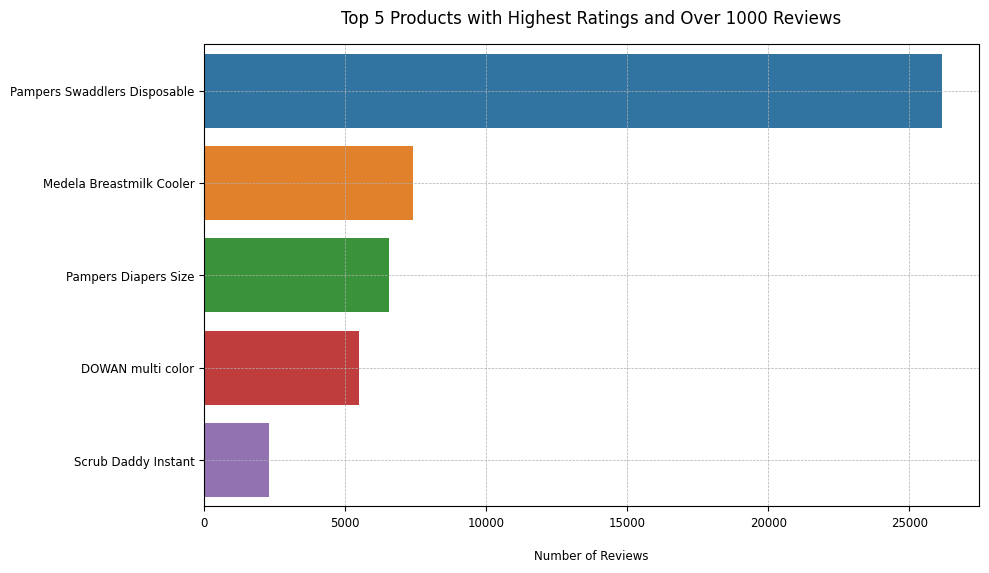

In [31]:
# Function to take only the first 3 words from the product name
def first_three_words(name):
    words = name.split()
    return ' '.join(words[:3])

# Changing the Apache Spark Dataframe to Panda Dataframe
df_top_5_product_review_pd = df_top_5_product_review.toPandas()
# Adjusting the product name for readability 
df_top_5_product_review_pd['name'] = df_top_5_product_review_pd['name'].apply(first_three_words)

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the bar chart using seaborn
sns.barplot(
    x="no_of_ratings",
    y="name",
    data=df_top_5_product_review_pd,
    hue="name",
    palette="tab10"
)

# Styling the plot
plt.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=0)
plt.title("Top 5 Products with Highest Ratings and Over 1000 Reviews", loc="center", pad=15, fontsize=12)
plt.xlabel("Number of Reviews", loc="center", labelpad=15, fontsize=8.5)
plt.ylabel("")  
plt.tick_params(axis='both', labelsize=8.5)

# Saving the plot as an image and uploading it to Hadoop
plt.savefig("top_5_products_based_on_highest_rating.png", dpi=300, bbox_inches='tight')
subprocess.run(["hdfs", "dfs", "-put", "-f", "top_5_products_based_on_highest_rating.png", "/user1/big_data_ca1/images/"])

# Showing the plot
plt.show()


In [8]:
# Filtering dataframe for the bottom 5 for ratings >= 1 and number of ratings > 1000
df_bottom_5_products_review = df.filter((F.col("ratings") >= 1) & (F.col("no_of_ratings") > 1000)) \
  .orderBy(F.asc("ratings"), F.asc("no_of_ratings")) \
  .limit(5)

df_bottom_5_products_review.show()

+--------------------+-------------------+------------------+-------+-------------+--------------+------------+
|                name|      main_category|      sub_category|ratings|no_of_ratings|discount_price|actual_price|
+--------------------+-------------------+------------------+-------+-------------+--------------+------------+
|DEVCOMM Phone Blu...|tv, audio & cameras|   All Electronics|    2.5|         1225|          1.54|         3.3|
|Prestige Roti Mak...|         appliances|    All Appliances|    2.6|         1411|         31.61|       37.35|
|TYING Men's Trend...|        men's shoes|      Casual Shoes|    2.7|         1942|          3.29|       10.98|
|Kuber Industries ...|     home & kitchen|All Home & Kitchen|    2.7|         1977|          3.83|        5.49|
|Generic Silica Ge...|    beauty & health|           Make-up|    2.8|         1645|          1.74|        3.29|
+--------------------+-------------------+------------------+-------+-------------+--------------+------

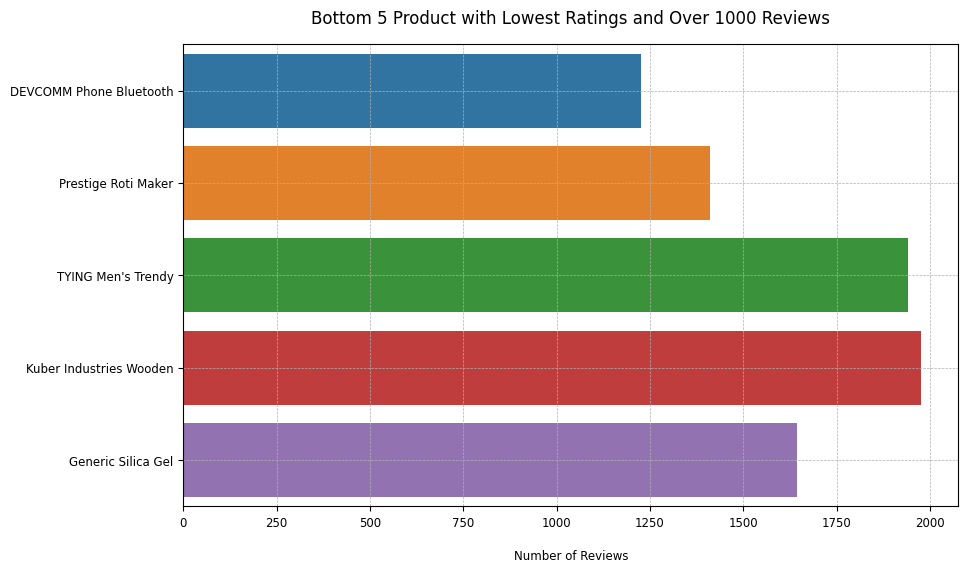

In [32]:
# Changing the Apache Spark Dataframe to Panda Dataframe
df_bottom_5_products_review_pd = df_bottom_5_products_review.toPandas()
# Adjusting the product name for readability 
df_bottom_5_products_review_pd['name'] = df_bottom_5_products_review_pd['name'].apply(first_three_words)

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the bar chart using seaborn
sns.barplot(
    x="no_of_ratings",
    y="name",
    data=df_bottom_5_products_review_pd,
    hue="name",
    palette="tab10"
)

# Styling the plot
plt.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=0)
plt.title("Bottom 5 Product with Lowest Ratings and Over 1000 Reviews", loc="center", pad=15, fontsize=12)
plt.xlabel("Number of Reviews", loc="center", labelpad=15, fontsize=8.5)
plt.ylabel("")  
plt.tick_params(axis='both', labelsize=8.5)

# Saving the plot as an image and uploading it to Hadoop
plt.savefig("bottom_5_products_based_on_lowest_rating.png", dpi=300, bbox_inches='tight')
subprocess.run(["hdfs", "dfs", "-put", "-f", "bottom_5_products_based_on_lowest_rating.png", "/user1/big_data_ca1/images/"])

# Showing the plot
plt.show()

In [10]:
# Grouping by 'main_category' and calculate summary statistics for prices
df_price_stats = df.groupBy("main_category").agg(
    F.min("actual_price").alias("min_actual_price"),
    F.max("actual_price").alias("max_actual_price"),
    F.percentile_approx("actual_price", 0.5).alias("median_actual_price"),
    F.min("discount_price").alias("min_discount_price"),
    F.max("discount_price").alias("max_discount_price"),
    F.percentile_approx("discount_price", 0.5).alias("median_discount_price")
).orderBy(col("median_actual_price").desc())

# Show dataframe
df_price_stats.show(5)

[Stage 6:=============================>                             (1 + 1) / 2]

+-------------------+----------------+----------------+-------------------+------------------+------------------+---------------------+
|      main_category|min_actual_price|max_actual_price|median_actual_price|min_discount_price|max_discount_price|median_discount_price|
+-------------------+----------------+----------------+-------------------+------------------+------------------+---------------------+
|home, kitchen, pets|            22.0|           87.56|              37.51|              19.8|             55.44|                26.39|
|        men's shoes|            0.43|          734.57|              27.49|               0.0|            733.14|                10.71|
|         appliances|            0.65|          6600.0|               23.1|               0.0|            2530.0|                12.09|
|              music|            0.66|         1346.84|              21.99|               0.0|             845.9|                 9.89|
|     bags & luggage|            0.88|         2

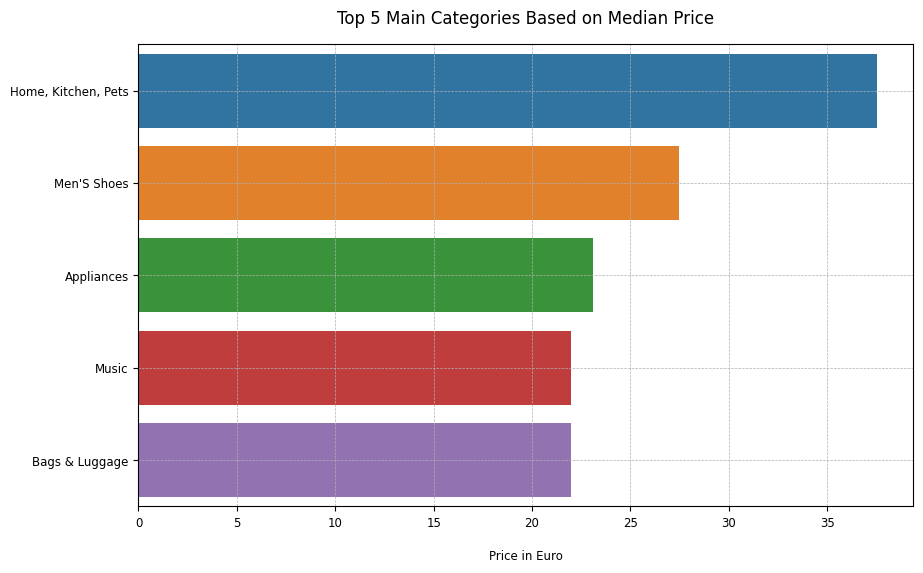

In [34]:
# Changing the Apache Spark Dataframe to Panda Dataframe
df_price_stats_pd = df_price_stats.toPandas()

# Retieving the top 5 main category
df_top_5_main_category = df_price_stats_pd.head(5)
# Applying the main category as a title for readability 
df_top_5_main_category.loc[:, "main_category"] = df_top_5_main_category["main_category"].apply(str.title)

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the bar chart using seaborn
sns.barplot(
    x="median_actual_price",
    y="main_category",
    data=df_top_5_main_category,
    hue="main_category",
    palette="tab10"
)

# Styling the plot
plt.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=0)
plt.title("Top 5 Main Categories Based on Median Price", loc="center", pad=15, fontsize=12)
plt.xlabel("Price in Euro", loc="center", labelpad=15, fontsize=8.5)
plt.ylabel("")  
plt.tick_params(axis='both', labelsize=8.5)

# Saving the plot as an image and uploading it to Hadoop
plt.savefig("top_5_main_categories_based_on_median_price.png", dpi=300, bbox_inches='tight')
subprocess.run(["hdfs", "dfs", "-put", "-f", "top_5_main_categories_based_on_median_price.png", "/user1/big_data_ca1/images/"])

# Showing the plot
plt.show()


In [12]:
# Calculating the total discount loss based on actual price - discount price
total_discount_loss = df.withColumn("discount_loss", F.col("actual_price") - F.col("discount_price")) \
                      .agg(
                          F.format_number(F.sum("actual_price"), 2).alias("total_actual_price"),
                          F.format_number(F.sum("discount_loss"), 2).alias("total_discount_loss")
                      ) 

total_discount_loss.show()

+------------------+-------------------+
|total_actual_price|total_discount_loss|
+------------------+-------------------+
|    125,611,499.88|     117,619,694.07|
+------------------+-------------------+



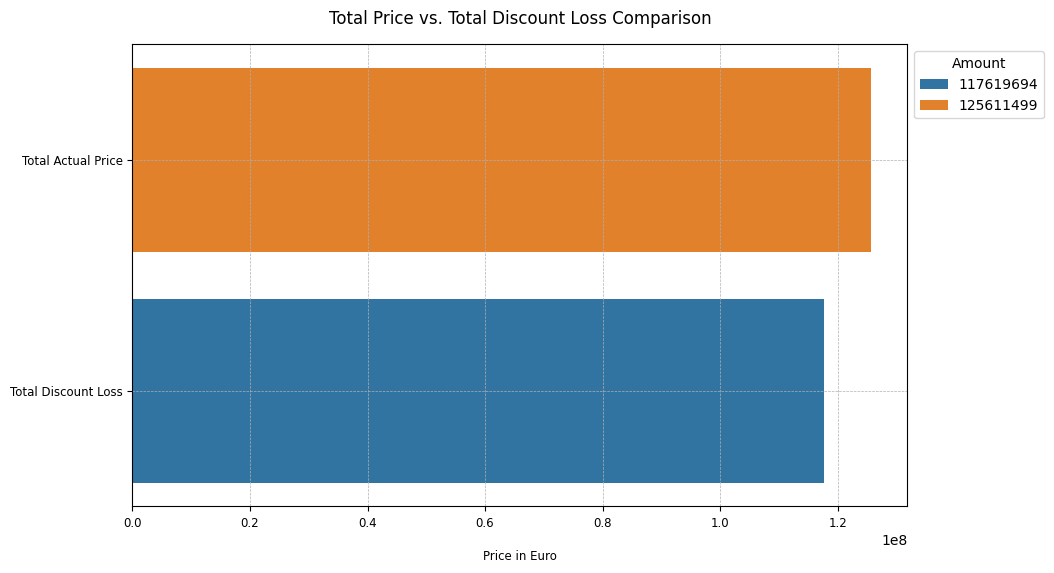

In [35]:
# Calculating the total discount loss based on actual price - discount price (without format_number)
total_discount_loss = df.withColumn("discount_loss", F.col("actual_price") - F.col("discount_price")) \
                      .agg(
                          F.sum("actual_price").alias("total_actual_price"),
                          F.sum("discount_loss").alias("total_discount_loss")
                      ) 

# Changing the Apache Spark Dataframe to Panda Dataframe
total_discount_loss_pd = total_discount_loss.toPandas()  

# Reshape the data for calculation and amount
total_discount_loss_reshape_sorted = pd.melt(total_discount_loss_pd, var_name="calculation", value_name="amount").sort_values(by="amount", ascending=False)

# Converting the amount value as an integer for readability 
total_discount_loss_reshape_sorted['amount'] = total_discount_loss_reshape_sorted['amount'].astype(int)
# Applying the caculation values as a title and removing "_" for readability 
total_discount_loss_reshape_sorted['calculation'] = total_discount_loss_reshape_sorted['calculation'].str.replace('_', ' ').str.title()

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the bar chart using seaborn
sns.barplot(
    x="amount",
    y="calculation",
    data=total_discount_loss_reshape_sorted,
    hue="amount",
    palette="tab10"
)

# Styling the plot
plt.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=0)
plt.title("Total Price vs. Total Discount Loss Comparison", loc="center", pad=15, fontsize=12)
plt.xlabel("Price in Euro", loc="center", labelpad=15, fontsize=8.5)
plt.ylabel("")  
plt.tick_params(axis='both', labelsize=8.5)

# Added a legend with title and move it outside the plot
plt.legend(title='Amount', bbox_to_anchor=(1,1), loc='upper left')

# Saving the plot as an image and uploading it to Hadoop
plt.savefig("total_price_vs_total_discount_loss.png", dpi=300, bbox_inches='tight')
subprocess.run(["hdfs", "dfs", "-put", "-f", "total_price_vs_total_discount_loss.png", "/user1/big_data_ca1/images/"])

# Showing the plot
plt.show()

In [14]:
# Grouping by 'main_category' and calculate average rating and total number of ratings
df_rating = df.groupBy("main_category") \
  .agg(
      F.round(F.avg("ratings"), 1).alias("average_rating"),
      F.sum("no_of_ratings").alias("total_number_ratings")
  ) \
  .orderBy(F.col("average_rating").desc()) \

df_rating.show()

+--------------------+--------------+--------------------+
|       main_category|average_rating|total_number_ratings|
+--------------------+--------------+--------------------+
|grocery & gourmet...|           3.7|             1571199|
|      home & kitchen|           3.6|             7356136|
|        pet supplies|           3.6|              894761|
|toys & baby products|           3.5|            12402530|
|              stores|           3.4|            11364674|
|               music|           3.2|              279078|
|     beauty & health|           3.1|             9140047|
|          appliances|           3.1|             9313000|
|    women's clothing|           3.0|             7050504|
|     car & motorbike|           3.0|             1412426|
| tv, audio & cameras|           2.7|           105574289|
| industrial supplies|           2.7|              826138|
|    sports & fitness|           2.7|             2280584|
|         accessories|           2.5|             796912

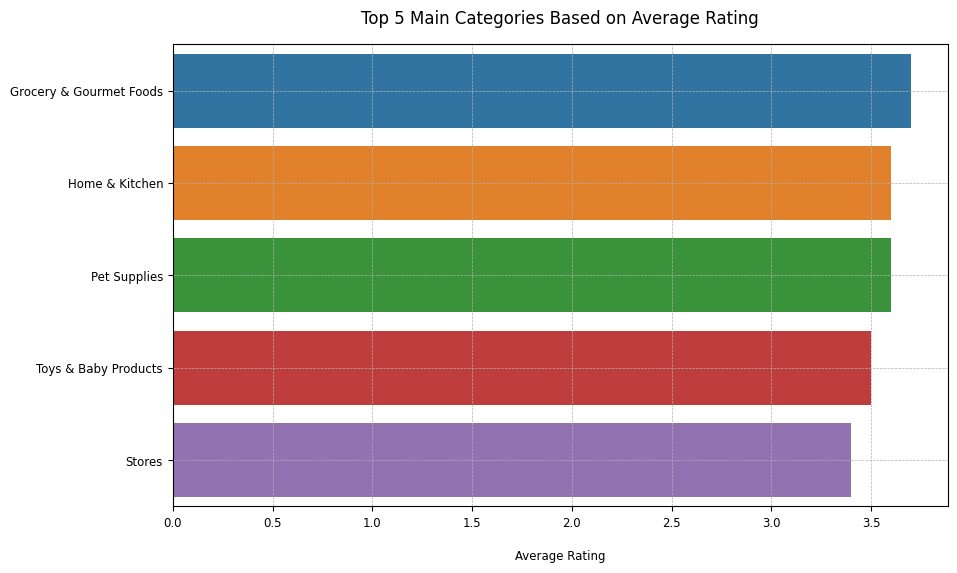

In [36]:
# Changing the Apache Spark Dataframe to Panda Dataframe
df_rating_pd = df_rating.toPandas()

# Retieving the top 5 main category
df_rating_top_5_main_category = df_rating_pd.head(5)

# Applying the main category as a title for readability 
df_rating_top_5_main_category.loc[:, "main_category"] = df_rating_top_5_main_category["main_category"].apply(str.title)

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the bar chart using seaborn
sns.barplot(
    x="average_rating",
    y="main_category",
    data=df_rating_top_5_main_category,
    hue="main_category",
    palette="tab10"
)

# Styling the plot
plt.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=0)
plt.title("Top 5 Main Categories Based on Average Rating", loc="center", pad=15, fontsize=12)
plt.xlabel("Average Rating", loc="center", labelpad=15, fontsize=8.5)
plt.ylabel("")  
plt.tick_params(axis='both', labelsize=8.5)

# Saving the plot as an image and uploading it to Hadoop
plt.savefig("top_5_main_categories_based_on_average_rating.png", dpi=300, bbox_inches='tight')
subprocess.run(["hdfs", "dfs", "-put", "-f", "top_5_main_categories_based_on_average_rating.png", "/user1/big_data_ca1/images/"])

# Showing the plot
plt.show()